# Домашнее задание 1



## Описание задания

* mail: rumiantsev.da@phystech.edu
* id: 4030163674
* type: classification
* dataset: Wine Data Set
* url: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine
* method: Метод потенциальных функций, SVM, Перцептрон

## Используемые пакеты

In [1]:
import importlib
import subprocess
import sys

# Список пакетов для проверки
packages = {
    "matplotlib": "2.1.0",
    "seaborn": "0.9.0",
    "pandas": "1.0.5",
    "tqdm": "4.48.2",
    "scipy": "1.3.3",
    "numpy": "1.19.1",
    "torch": "1.9.0",
    "torchvision": "0.10.1",
    "mlxtend": "0.19.0"
}

# Функция для установки пакета, если он не установлен
def install_package(package, version):
    try:
        # Проверка импорта пакета
        pkg = importlib.import_module(package)
        # Проверка версии пакета
        installed_version = pkg.__version__
        # Если пакет есть, ничего не делаем
        if installed_version == version or installed_version != version:
            return
    except ImportError:
        # Установка пакета, если он не установлен
        subprocess.check_call([sys.executable, "-m", "pip", "install", f"{package}=={version}"])

# Проверка и установка пакетов
for package, version in packages.items():
    install_package(package, version)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

## Загрузка выборки

In [3]:
# Загружаем выборку
wine_data = load_wine()

X = wine_data.data
Y = wine_data.target

# Создаем Data Frame для удобства
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_with_target_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_with_target_df['target'] = wine_data.target

# Выводим выборку
display(wine_with_target_df.head(5).style.set_caption("Wine Data Set with Target Labels").set_properties(**{'text-align': 'center'})) # Выводим первые пять строк
# display(wine_with_target_df.style.set_caption("Wine Data Set with Target Labels").set_properties(**{'text-align': 'center'})) # Выводим всю выборку

## Анализ выборки

Признаки и их типы:
alcohol: вещественный
malic_acid: вещественный
ash: вещественный
alcalinity_of_ash: вещественный
magnesium: вещественный
total_phenols: вещественный
flavanoids: вещественный
nonflavanoid_phenols: вещественный
proanthocyanins: вещественный
color_intensity: вещественный
hue: вещественный
od280/od315_of_diluted_wines: вещественный
proline: вещественный

Тип ответов:
target: вещественный

Множество ответов: {0, 1, 2}

Размер выборки составляет l = 178 объектов.


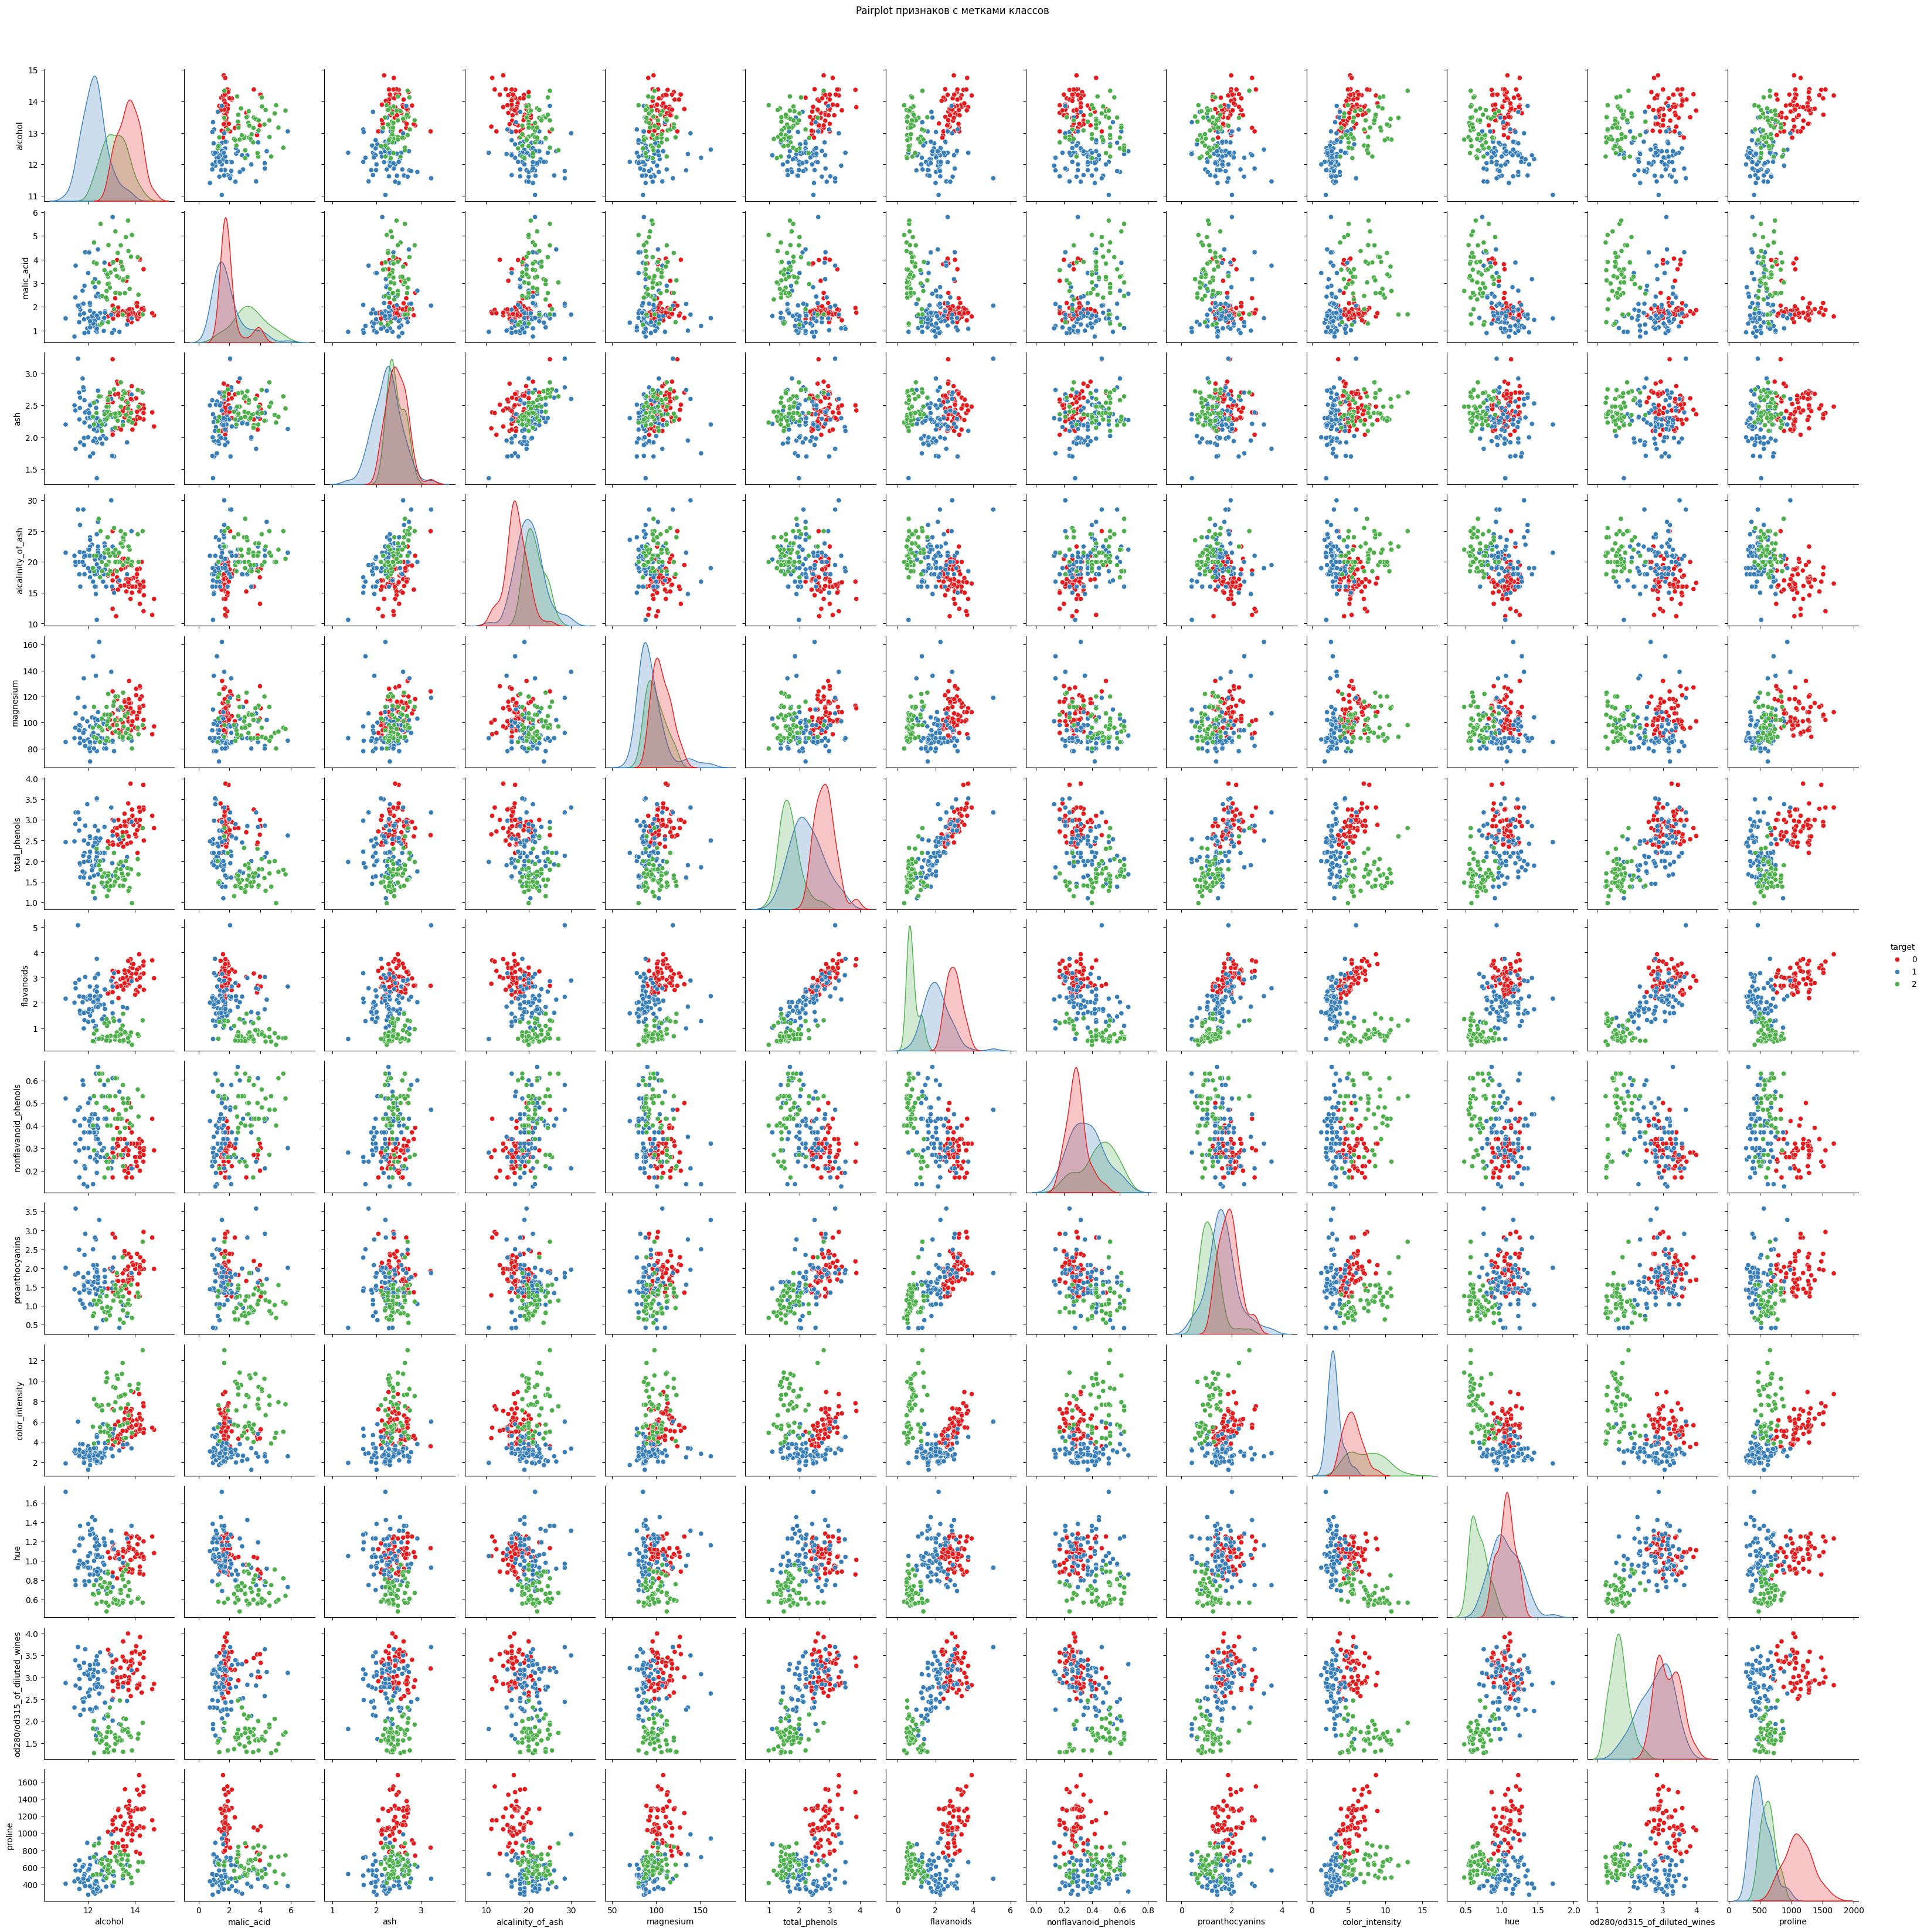

In [4]:
# 1. Анализ выборки
# Вывод признаков и их типов
print("Признаки и их типы:")
for column in wine_df.columns:
    if pd.api.types.is_numeric_dtype(wine_df[column]):
        print(f"{column}: вещественный")
    elif pd.api.types.is_string_dtype(wine_df[column]):
        print(f"{column}: текстовый")
    else:
        print(f"{column}: неизвестный тип")

# Вывод ответов и их типов
print("\nТип ответов:")
if pd.api.types.is_numeric_dtype(wine_with_target_df['target']):
  print(f"{'target'}: вещественный")
elif pd.api.types.is_string_dtype(wine_with_target_df['target']):
  print(f"{'target'}: текстовый")
else:
  print(f"{'target'}: неизвестный тип")

print("\nМножество ответов: {0, 1, 2}")
print('\nРазмер выборки составляет l = {} объектов.'.format(len(wine_df)))

# 2. Визуальный анализ данных
# Строим pairplot для визуализации взаимосвязей между признаками
sns.pairplot(wine_with_target_df, hue='target', palette='Set1')
plt.suptitle("Pairplot признаков с метками классов", y=1.02)
plt.show()

Анализ графиков
- Признаки с хорошим разделением
 - Flavanoids
 - Alcohol
 - Color Intensity
 - OD280/OD315 of diluted wines
 - Proline
- Признаки с умеренным разделением
 - Malic Acid
 - Ash
 - Alcalinity of Ash
 - Proanthocyanins
 - Hue
- Признаки с плохим разделением
 - Magnesium
 - Total Phenols
 - Nonflavanoid Phenols

## Препроцессинг данных

In [5]:
# 1. Преобразуем категориальные признаки (в данном случае пропускаем, так как их нет)

# 2. Нормализация признаков
scaler = MinMaxScaler()
# scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

wine_scaled = pd.DataFrame(scaler.fit_transform(wine_df), columns=wine_data.feature_names)
wine_with_target_scaled_df = pd.DataFrame(scaler.fit_transform(wine_df), columns=wine_data.feature_names)
wine_with_target_scaled_df['target'] = wine_with_target_df['target']

display(wine_with_target_scaled_df.head(5).style.set_caption("Scaled Wine Data Set with Target Labels").set_properties(**{'text-align': 'center'})) # Выводим первые пять строк
# display(wine_with_target_scaled_df.style.set_caption("Scaled Wine Data Set with Target Labels").set_properties(**{'text-align': 'center'})) # Выводим всю нормализованную выборку

## Эксперименты для предложенных методов

### Метод потенциальных функций


Evaluating RBF Kernel (sigma=1.0)...

Classification report for RBF Kernel (sigma=1.0):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      0.95      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54


Evaluating RBF Kernel (sigma=0.5)...

Classification report for RBF Kernel (sigma=0.5):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Evaluating Polynomial Kernel (degree=2)...

Classification 

Best kernel: RBF Kernel (sigma=0.5)


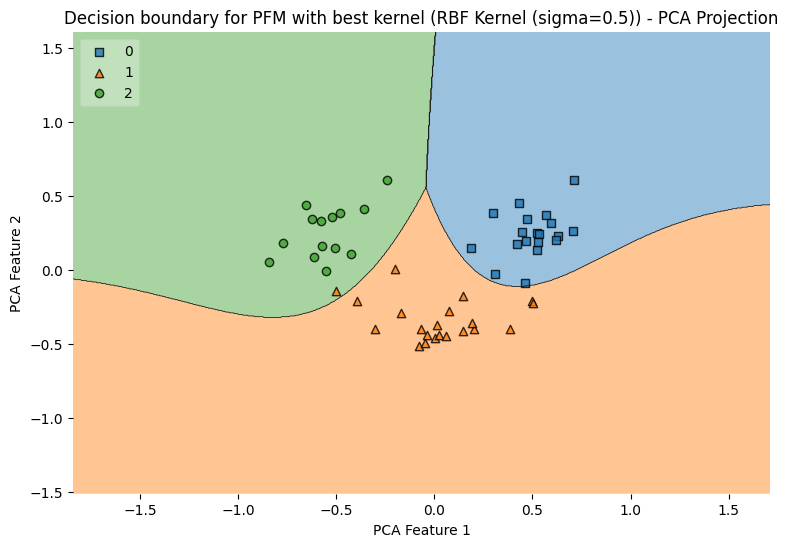

In [6]:
# Нормализация данных
# scaler = StandardScaler()
scaler = MinMaxScaler() # Показывает лучший результат
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающие и тестовые выборки
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

# Класс метода потенциальных функций
class PFM(object):
    def __init__(self, kernel=None):
        self.X, self.Y, self.gams = None, None, None
        self.kernel = lambda x: np.ones_like(x)
        if kernel is not None:
            self.kernel = kernel

    def scores(self, X):
        features = self.gams * self.kernel(cdist(X, self.X))
        scores = np.vstack([np.sum(features.T[np.where(self.Y == i)[0]].T, axis=-1)
                            for i in np.unique(self.Y)]).T
        return scores

    def predict(self, X):
        return np.argmax(self.scores(X), axis=-1)

    def fit(self, X, Y, epoch=10):
        self.X, self.Y, self.gams = np.array(X), np.array(Y), np.zeros_like(Y)
        for _ in range(epoch):
            for i, (x, y) in enumerate(zip(self.X, self.Y)):
                if self.predict(np.array([x]))[0] != y:
                    self.gams[i] += 1

# Определение разных типов ядер
def rbf_kernel(distance, sigma=1.0):
    return np.exp(-distance**2 / (2 * sigma**2))

def poly_kernel(distance, degree=2):
    return (1 + distance)**degree

def epanechnikov_kernel(distance, h=0.05):
    ret = np.array(distance) / h
    return (1 - ret**2) * (np.abs(ret) <= 1)

# Функция для оценки модели по метрикам
def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Вычисление метрик для тренировочной выборки
    train_accuracy = accuracy_score(Y_train, y_train_pred)
    train_precision = precision_score(Y_train, y_train_pred, average='weighted', zero_division=0)
    train_recall = recall_score(Y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(Y_train, y_train_pred, average='weighted')

    # Вычисление метрик для тестовой выборки
    test_accuracy = accuracy_score(Y_test, y_test_pred)
    test_precision = precision_score(Y_test, y_test_pred, average='weighted', zero_division=0)
    test_recall = recall_score(Y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(Y_test, y_test_pred, average='weighted')

    # Отчет классификации для тестовой выборки
    classification_report_str = classification_report(Y_test, y_test_pred)

    return {
        "train_accuracy": train_accuracy, "train_precision": train_precision,
        "train_recall": train_recall, "train_f1": train_f1,
        "test_accuracy": test_accuracy, "test_precision": test_precision,
        "test_recall": test_recall, "test_f1": test_f1,
        "classification_report": classification_report_str
    }

# Функция для подбора оптимального ядра
def optimize_kernel(X_train, Y_train, X_test, Y_test):
    kernels = {
        'RBF Kernel (sigma=1.0)': lambda x: rbf_kernel(x, sigma=1.0),
        'RBF Kernel (sigma=0.5)': lambda x: rbf_kernel(x, sigma=0.5),
        'Polynomial Kernel (degree=2)': lambda x: poly_kernel(x, degree=2),
        'Polynomial Kernel (degree=3)': lambda x: poly_kernel(x, degree=3),
        'Epanechnikov Kernel (h=1)': lambda x: epanechnikov_kernel(x, h=1),
        'Epanechnikov Kernel (h=2)': lambda x: epanechnikov_kernel(x, h=2)
    }

    results = []
    best_kernel = None
    best_metrics = None
    best_test_accuracy = 0

    for kernel_name, kernel_func in kernels.items():
        print(f"\nEvaluating {kernel_name}...")
        model = PFM(kernel=kernel_func)
        model.fit(X_train, Y_train)

        metrics = evaluate_model(model, X_train, Y_train, X_test, Y_test)
        test_accuracy = metrics["test_accuracy"]

        # Добавляем результаты в список
        results.append({
            'Kernel': kernel_name,
            'Train Accuracy': metrics['train_accuracy'],
            'Test Accuracy': metrics['test_accuracy'],
            'Train Precision': metrics['train_precision'],
            'Test Precision': metrics['test_precision'],
            'Train Recall': metrics['train_recall'],
            'Test Recall': metrics['test_recall'],
            'Train F1 Score': metrics['train_f1'],
            'Test F1 Score': metrics['test_f1'],
            'Classification Report': metrics['classification_report']
        })

        # Сохраняем лучший результат
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_kernel = kernel_name
            best_metrics = metrics

        # Вывод результатов для текущего ядра
        print(f"\nClassification report for {kernel_name}:\n{metrics['classification_report']}")

    # Возвращаем лучший результат и все результаты
    return best_kernel, best_metrics, results

# Оптимизация и выбор лучшего ядра
best_kernel, best_metrics, all_results = optimize_kernel(X_train, Y_train, X_test, Y_test)

# Преобразуем результаты в DataFrame для наглядности и выводим таблицу
results_df = pd.DataFrame(all_results)
display(results_df.drop(columns='Classification Report').style.set_caption("Final results for different kernels").set_properties(**{'text-align': 'center'}))

print(f"Best kernel: {best_kernel}")

# Визуализация результатов с использованием PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Обучение модели с лучшим ядром на данных с уменьшенной размерностью
best_kernel_func = {
    'RBF Kernel (sigma=1.0)': lambda x: rbf_kernel(x, sigma=1.0),
    'RBF Kernel (sigma=0.5)': lambda x: rbf_kernel(x, sigma=0.5),
    'Polynomial Kernel (degree=2)': lambda x: poly_kernel(x, degree=2),
    'Polynomial Kernel (degree=3)': lambda x: poly_kernel(x, degree=3),
    'Epanechnikov Kernel (h=1)': lambda x: epanechnikov_kernel(x, h=1),
    'Epanechnikov Kernel (h=2)': lambda x: epanechnikov_kernel(x, h=2)
}[best_kernel]

best_model = PFM(kernel=best_kernel_func)
best_model.fit(X_train_pca, Y_train)

# Визуализация границ решений с использованием PCA
plt.figure(figsize=(9, 6))
plot_decision_regions(X_test_pca, Y_test, clf=best_model, legend=2)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title(f"Decision boundary for PFM with best kernel ({best_kernel}) - PCA Projection")
plt.show()


### SVM


Evaluating rbf kernel...

Train Classification Report for rbf kernel:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.98      0.99        50
           2       0.97      1.00      0.99        34

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124


Test Classification Report for rbf kernel:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Evaluating linear kernel...

Train Classification Report for linear kernel:
               precision    recall  f1-score

Best kernel: rbf, Parametrs: {'C': 10, 'gamma': 0.01}


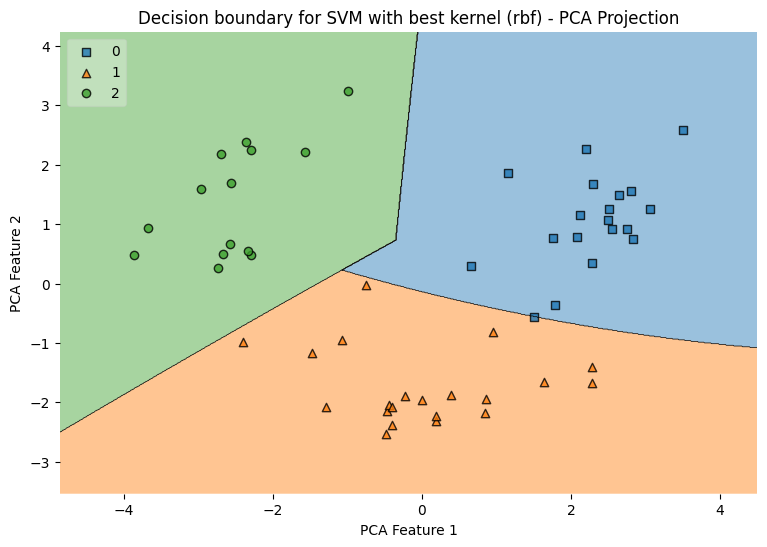

In [7]:
# Нормализация данных
scaler = StandardScaler() # Показывает лучший результат
# scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающие и тестовые выборки
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

# Список ядер и гиперпараметров для подбора
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'degree': [1, 2, 3, 4],  # Для полиномиального ядра
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Для RBF и сигмоидального ядер
}

kernels = ['rbf', 'linear', 'poly', 'sigmoid']

# Словарь для сохранения результатов
results = {'Kernel': [], 'Best Params': [], 'Train Accuracy': [], 'Test Accuracy': [],
           'Train Precision': [], 'Test Precision': [],
           'Train Recall': [], 'Test Recall': [],
           'Train F1 Score': [], 'Test F1 Score': []}

# Перебор ядер
for kernel in kernels:
    print(f"\nEvaluating {kernel} kernel...")

    # Определяем параметры поиска
    param_grid_ = param_grid.copy()
    if kernel != 'poly':
        param_grid_.pop('degree', None)

    # Инициализируем SVM и выполняем GridSearchCV для поиска лучших параметров
    model = GridSearchCV(SVC(kernel=kernel), param_grid_, cv=5, scoring='accuracy')
    model.fit(X_train, Y_train)

    # Лучшие параметры и оценка на тренировочной и тестовой выборках
    best_model = model.best_estimator_
    Y_train_pred = best_model.predict(X_train)
    Y_test_pred = best_model.predict(X_test)

    # Вычисляем метрики для обучающей выборки
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    train_precision = precision_score(Y_train, Y_train_pred, average='weighted', zero_division=0)
    train_recall = recall_score(Y_train, Y_train_pred, average='weighted')
    train_f1 = f1_score(Y_train, Y_train_pred, average='weighted')

    # Вычисляем метрики для тестовой выборки
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_precision = precision_score(Y_test, Y_test_pred, average='weighted', zero_division=0)
    test_recall = recall_score(Y_test, Y_test_pred, average='weighted')
    test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')

    # Сохраняем результаты
    results['Kernel'].append(kernel)
    results['Best Params'].append(model.best_params_)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)
    results['Train Precision'].append(train_precision)
    results['Test Precision'].append(test_precision)
    results['Train Recall'].append(train_recall)
    results['Test Recall'].append(test_recall)
    results['Train F1 Score'].append(train_f1)
    results['Test F1 Score'].append(test_f1)

    # Вывод отчёта классификации для каждой модели
    print(f"\nTrain Classification Report for {kernel} kernel:\n", classification_report(Y_train, Y_train_pred))
    print(f"\nTest Classification Report for {kernel} kernel:\n", classification_report(Y_test, Y_test_pred))

# Преобразуем результаты в DataFrame для наглядности и выводим таблицу
results_df = pd.DataFrame(results)
display(results_df.style.set_caption("Final results for different kernels").set_properties(**{'text-align': 'center'}))

# Оптимизация и выбор лучшего ядра
best_kernel_name = results_df.loc[results_df['Test Accuracy'].idxmax()]['Kernel']
best_kernel_params = results_df.loc[results_df['Test Accuracy'].idxmax()]['Best Params']

print(f"Best kernel: {best_kernel_name}, Parametrs: {best_kernel_params}")

# Обучение модели с лучшим ядром на данных с оригинальной размерностью
best_model = SVC(kernel=best_kernel_name, **best_kernel_params)
best_model.fit(X_train, Y_train)

# Визуализация результатов с использованием PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Обучаем модель на PCA
best_model.fit(X_train_pca, Y_train)

# Визуализация границ решений с использованием PCA
plt.figure(figsize=(9, 6))
plot_decision_regions(X_test_pca, Y_test, clf=best_model, legend=2)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title(f"Decision boundary for SVM with best kernel ({best_kernel_name}) - PCA Projection")
plt.show()

### Перцептрон


Metrics for Perceptron:
Train Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Test Metrics:
Accuracy: 0.9815
Precision: 0.9827
Recall: 0.9815
F1 Score: 0.9816

Final classification report for Perceptron (Test):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



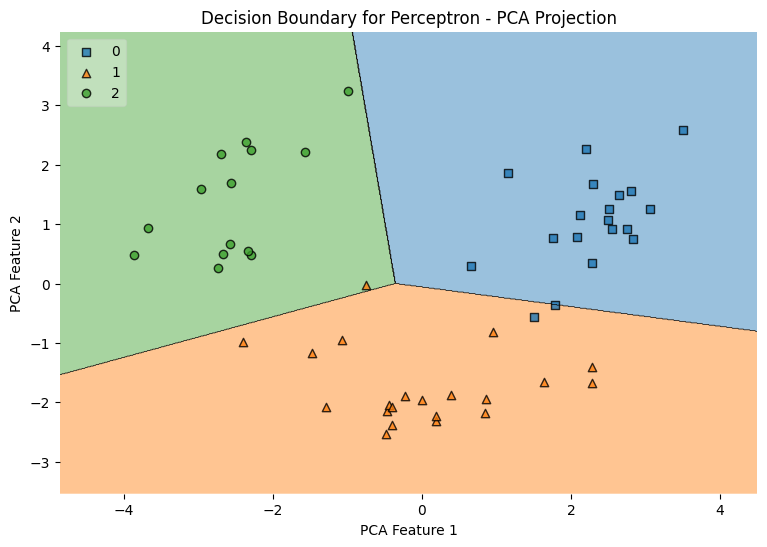

In [8]:
# Нормализация данных
scaler = StandardScaler()  # Показывает лучший результат
# scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающие и тестовые выборки
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

# Обучение и оценка модели перцептрона
perceptron_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron_model.fit(X_train, Y_train)

# Предсказания для обучающей и тестовой выборок
Y_train_pred_perceptron = perceptron_model.predict(X_train)
Y_test_pred_perceptron = perceptron_model.predict(X_test)

# Вычисляем метрики для обучающей выборки
train_accuracy = accuracy_score(Y_train, Y_train_pred_perceptron)
train_precision = precision_score(Y_train, Y_train_pred_perceptron, average='weighted', zero_division=0)
train_recall = recall_score(Y_train, Y_train_pred_perceptron, average='weighted')
train_f1 = f1_score(Y_train, Y_train_pred_perceptron, average='weighted')

# Вычисляем метрики для тестовой выборки
test_accuracy = accuracy_score(Y_test, Y_test_pred_perceptron)
test_precision = precision_score(Y_test, Y_test_pred_perceptron, average='weighted', zero_division=0)
test_recall = recall_score(Y_test, Y_test_pred_perceptron, average='weighted')
test_f1 = f1_score(Y_test, Y_test_pred_perceptron, average='weighted')

# Вывод метрик для обучающей и тестовой выборок
print("\nMetrics for Perceptron:")
print("Train Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

# Вывод отчета классификации для тестовой выборки
print("\nFinal classification report for Perceptron (Test):\n")
print(classification_report(Y_test, Y_test_pred_perceptron))

# Визуализация результатов с использованием PCA для перцептрона
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Обучаем модель перцептрона на данных с уменьшенной размерностью
perceptron_model.fit(X_train_pca, Y_train)

# Визуализация границ решений для перцептрона
plt.figure(figsize=(9, 6))
plot_decision_regions(X_test_pca, Y_test, clf=perceptron_model, legend=2)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title(f"Decision Boundary for Perceptron - PCA Projection")
plt.show()

## Вывод

1. Метод потенциальных функций (PFM):

Лучшее ядро: в ходе оптимизации различных ядер наилучшие результаты по тестовой точности показало RBF-ядро с параметром sigma=0.5 и Epanechnikov-ядро с h=2.

Результаты на тестовой выборке:
- Точность (Accuracy): около 98% с использованием RBF(sigma=0.5) и Epanechnikov(h=2) ядер.
- Метрики (Precision, Recall, F1 Score) также показали высокие значения, что свидетельствует о том, что модель хорошо справляется с классификацией во всех классах.

Преимущества: метод показал высокую точность и способность хорошо адаптироваться к различным типам данных благодаря выбору ядра.

Недостатки: нужно подбирать гиперпараметры.

2. Метод опорных векторов (SVM):

Результаты на тестовой выборке:
- Точность (Accuracy): около 98% с использованием RBF, linear и poly ядер.
- Метрики (Precision, Recall, F1 Score) также находятся на высоком уровне, подтверждая хорошую способность модели разделять классы.

Преимущества: метод показал высокие результаты сразу с тремя ядрами RBF, linear и poly.

Недостатки: нужно подбирать гиперпараметры.

3. Метод Перцептрон:

Результаты на тестовой выборке:
- Точность (Accuracy): около 98%.
- Метрики (Precision, Recall, F1 Score) также находятся на высоком уровне, что показывает, что этот метод хорошо сработал для данного датасета.

Преимущества: простота и скорость обучения.

Недостатки: Перцептрон хуже справляется с задачами, где данные не являются линейно разделимыми.

4. Итоговые выводы

- Наилучшая модель: все три модели показали одинаково высокий результат точности около 98%. Скорее всего это обусловлено хорошо разделяемой выборкой.

- Проблемы и ограничения:
 - Оптимизация гиперпараметров: для метода потенциальных функций и SVM требовалась оптимизация гиперпараметров. Выбор неправильного ядра или значений гиперпараметров может значительно ухудшить результаты.

- Совпадение с ожиданиями: результаты частично совпали с ожиданиями. Ожидаемо,
 метод опорных векторов и метод потенциальных функций хорошо справились с задачей. Однако, я не ожидал таких хороших результатов от Перцептрона. Этот датасет имеет хорошо разделяемые данные, что очень хорошо подходит для Перцептрона.